## 金额抽奖程序

@param minAmt 最小金额

@param maxAmt 最大金额

@param totAmt 总奖池

@param avgAmt 平均金额

In [3]:
import random

In [42]:
def fanxian(minAmt, maxAmt, totAmt, avgAmt):
    cnt = int(round(totAmt / avgAmt, 0))
    print('期望参与人数：', cnt)
    leftAmt = totAmt
    result = []
    for i in range(cnt):
        # 当前可分配最大
        tmpMax = round(min(maxAmt, leftAmt - minAmt*(cnt - i - 1)),2)
        print('当前可分配最大金额为: ', tmpMax)
        curInt = random.randint(minAmt*100, tmpMax*100)
        curAmt = curInt/100
        result.append(curAmt)
        leftAmt = round(leftAmt - curAmt,2)
        print('第{}个分配金额为：{}, 剩余奖池为：{}'.format(i,curAmt,leftAmt))
    return result

In [43]:
fanxian(0.01,50,50,10)

期望参与人数： 5
当前可分配最大金额为:  49.96
第0个分配金额为：46.18, 剩余奖池为：3.82
当前可分配最大金额为:  3.79
第1个分配金额为：2.03, 剩余奖池为：1.79
当前可分配最大金额为:  1.77
第2个分配金额为：0.31, 剩余奖池为：1.48
当前可分配最大金额为:  1.47
第3个分配金额为：1.14, 剩余奖池为：0.34
当前可分配最大金额为:  0.34
第4个分配金额为：0.19, 剩余奖池为：0.15


[46.18, 2.03, 0.31, 1.14, 0.19]

In [99]:
## 优化，避免前面金额太大，如可取前0.4的最大为tmpMax/2
## note，这里不需要把奖池耗光，故不考虑最后一个拿走所有，仍为random取值
def fanxian(minAmt, maxAmt, totAmt, avgAmt):
    if totAmt <= maxAmt*1.5:
        cnt = math.floor(totAmt / avgAmt)
#     print('期望参与人数：', cnt)
        leftAmt = totAmt
        result = []
        for i in range(cnt):
            # 当前可分配最大
            tmpMax = round(min(maxAmt, leftAmt - minAmt*(cnt - i - 1)),2)
#             if i <= cnt*0.4:
#                 tmpMax = round(min(tmpMax / 2, 2.5*avgAmt), 2)
#             if tmpMax>=maxAmt:
#                 print('当前可分配最大金额为: ', tmpMax)
#             print('当前可分配最大金额为: ', tmpMax)
#             print(minAmt*100, tmpMax*100)
            curInt = random.randint(minAmt*100, int(round(tmpMax,2)*100))
#             print('curInt：',curInt)
            curAmt = curInt*1.0/100
            result.append(curAmt)
            leftAmt = round(leftAmt - curAmt,2)
#             print('第{}个分配金额为：{}, 剩余奖池为：{}'.format(i,curAmt,leftAmt))
        return result
    else:
        return fanxian(minAmt, maxAmt, totAmt/2, avgAmt) + fanxian(minAmt, maxAmt, totAmt/2, avgAmt)

In [100]:
# 重复十次抽奖
# 每次抽奖如下：
# 最小金额0.01，最大金额99，总池子1万，笔均金额0.15
for i in range(1):
    result = fanxian(0.01,99,100,2)
#     print(result)
    print('分配人数：',len(result),'平均分配金额：', round(sum(result)/len(result),2),'  剩余奖池为:', 10000 - round(sum(result),2))
    print(sorted(result)[::-1][0])

分配人数： 50 平均分配金额： 2.0   剩余奖池为: 9900.0
44.99


In [101]:
print(result)

[36.23, 0.43, 2.77, 44.99, 4.32, 2.27, 6.41, 0.61, 0.41, 0.05, 1.07, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


In [94]:
result = fanxian(0.01,99,10000,0.15)

In [85]:
sum([32.3, 42.25, 27.95, 38.48, 27.0, 30.38, 24.1, 8.84, 23.09, 6.98, 16.57, 35.29, 30.58, 6.79, 8.76, 15.68, 0.39, 6.19, 45.44, 13.83, 24.82, 49.35, 32.21, 27.75, 46.86, 32.98, 10.76, 27.55, 38.47, 45.31, 20.83, 34.07, 8.89, 3.8, 39.36, 30.71, 20.26, 4.9, 24.26, 37.08, 27.49, 36.43, 5.42, 34.43, 31.78, 48.58, 44.55, 23.67, 8.18, 36.69, 16.59, 14.47, 44.16, 29.1, 1.65, 32.64, 32.02, 26.09, 6.59, 36.03, 27.88, 40.63, 39.15, 12.53, 11.23, 1.86, 41.88, 38.01, 48.79, 9.98, 40.24, 6.14, 38.39, 37.71, 31.41, 31.96, 45.22, 39.87, 31.88, 46.17, 20.93, 12.53, 43.2, 37.51, 24.86, 44.72, 25.23, 27.42, 47.92, 30.34, 36.72, 29.18, 26.93, 41.35, 24.83, 33.96, 8.85, 47.99, 14.29, 22.23, 13.91, 25.2, 33.7, 8.64, 8.69, 20.99, 24.63, 7.07, 41.6, 15.68, 23.61, 26.07, 15.92, 1.42, 29.42, 10.09, 31.16, 42.62, 8.45, 0.02, 15.36, 9.37, 29.58, 6.41, 3.85, 37.71, 26.34, 18.62, 40.17, 24.88, 19.46, 7.2, 10.03, 9.34, 19.23, 35.37, 3.68, 15.02, 24.71, 43.71, 44.12, 26.14, 28.9, 3.04, 37.92, 28.52, 29.14, 38.03, 2.45, 20.48, 12.95, 11.34, 5.69, 17.29, 8.44, 10.22, 10.57, 43.87, 30.51, 35.25, 4.45, 35.43, 29.07, 20.33, 47.62, 27.79, 28.34, 28.53, 2.34, 3.59, 9.24, 11.99, 30.14, 37.43, 21.69, 20.12, 34.19, 31.62, 6.41, 16.63, 1.14, 21.72, 38.64, 8.9, 46.12, 21.11, 13.96, 29.21, 19.8, 33.31, 1.4, 14.33, 25.33, 15.3, 30.72, 5.82, 27.39, 0.3, 7.25, 45.02, 11.03, 31.54, 33.84, 38.68, 44.24, 39.23, 27.39, 22.52, 17.08, 46.21, 26.79, 38.96, 27.91, 42.27, 10.15, 40.54, 30.76, 0.11, 48.01, 15.22, 41.59, 38.19, 44.13, 19.78, 19.89, 21.83, 14.32, 36.44, 1.19, 28.42, 32.97, 39.84, 10.99, 10.6, 47.27, 19.4, 13.4, 21.62, 49.4, 9.0, 11.99, 47.29, 42.34, 29.45, 11.79, 8.57, 10.32, 45.33, 18.21, 42.03, 7.24, 47.83, 45.8, 4.14, 43.43, 25.62, 22.99, 19.28, 2.15, 42.42, 11.37, 47.42, 35.4, 28.75, 48.44, 21.16, 5.76, 34.6, 33.64, 16.32, 34.23, 38.5, 11.1, 25.41, 48.94, 46.37, 1.46, 35.59, 38.57, 47.87, 17.26, 9.68, 16.83, 32.12, 44.92, 18.09, 30.96, 46.58, 38.35, 37.36, 21.27, 21.99, 31.11, 26.31, 28.82, 27.68, 22.85, 47.75, 47.85, 32.33, 8.78, 25.29, 16.47, 18.04, 0.5, 23.28, 8.24, 41.15, 48.58, 36.96, 13.15, 43.93, 41.89, 13.96, 38.56, 35.07, 17.91, 14.43, 12.07, 1.29, 6.97, 17.2, 5.01, 8.83, 9.95, 18.18, 6.04, 35.73, 3.92, 27.46, 44.8, 28.98, 45.09, 3.86, 30.26, 4.29, 38.37, 24.72, 17.33, 40.45, 8.36, 8.52, 38.58, 17.16, 29.18, 3.94, 41.03, 0.07, 27.34, 15.11, 21.01, 14.21, 45.65, 35.52, 8.34, 3.74, 11.73, 6.0, 1.21, 45.78, 40.92, 44.08, 32.35, 6.22, 10.16, 48.58, 3.77, 18.04, 46.12, 32.96, 6.56, 39.96, 31.41, 22.22, 43.82, 2.2, 43.06, 42.95, 22.93, 5.01, 34.79, 17.1, 29.2, 26.0, 26.13, 26.12, 35.26, 13.4, 31.05, 3.28, 18.88, 23.54, 45.91, 39.33, 20.37, 33.08, 15.91, 14.23, 9.14, 13.42, 7.28, 7.82, 0.12, 0.49, 0.01, 0.21, 0.06, 0.02, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

10000.000000000131

In [86]:
from matplotlib import pyplot as plt
import math
from collections import Counter

In [87]:
result_gp = ['0.01' if x==0.01 else str(math.floor(x/10)) for x in sorted(result)[::-1]]

In [88]:
Counter(result_gp)

Counter({'9': 12,
         '8': 10,
         '7': 10,
         '6': 17,
         '5': 19,
         '4': 27,
         '3': 28,
         '2': 36,
         '1': 58,
         '0': 472,
         '0.01': 65935})

(array([1.2000e+01, 1.0000e+01, 1.0000e+01, 1.7000e+01, 1.9000e+01,
        2.7000e+01, 2.8000e+01, 3.6000e+01, 5.8000e+01, 6.6407e+04]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

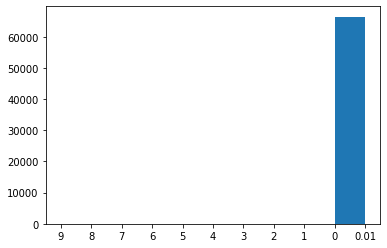

In [90]:
plt.hist(result_gp)

In [ ]:
print(result)

## ccb返现随机程序

In [6]:
import random
import numpy as np

In [59]:
def fanxian(maxCnt):
    if maxCnt<=10000:
        result = []
        order1 = min(maxCnt,9725)
#         print("order1:",order1)
        for i in range(order1):
            result.append(random.randint(1, 19)/100.0)
        maxCnt -= order1
        order2 = min(maxCnt,216)
#         print("order2:",order2)
        for i in range(order2):
            result.append(random.randint(20, 40)/100.0)
        maxCnt -= order2
        order3 = min(maxCnt,50)
#         print("order3:",order3)
        for i in range(order3):
            result.append(random.randint(41, 159)/100.0)
        maxCnt -= order3
        order4 = min(maxCnt,8)
#         print("order4:",order4)
        for i in range(order4):
            result.append(random.randint(160, 9840)/100.0)
        maxCnt -= order4
        order5 = min(maxCnt,1)
#         print("order5:",order5)
        for i in range(order5):
            result.append(99)
        
        return result
    
    else:
        
        return fanxian(10000) + fanxian(maxCnt-10000)
    # random 
    

In [42]:
len(fanxian(10000))

order1: 9725
order2: 216
order3: 50
order4: 8
order5: 1


10000

In [48]:
len(fanxian(39800))

order1: 9725
order2: 216
order3: 50
order4: 8
order5: 1
order1: 9725
order2: 216
order3: 50
order4: 8
order5: 1
order1: 9725
order2: 216
order3: 50
order4: 8
order5: 1
order1: 9725
order2: 75
order3: 0
order4: 0
order5: 0


39800

In [55]:
np.mean(fanxian(10000)[0:9725])

order1: 9725
order2: 216
order3: 50
order4: 8
order5: 1


0.1000102827763496

In [61]:
# 人数 50万
person_cnt = 500000
# 人均天交易2笔
trans_person = 2
# 交易25天
days = 25

In [65]:
# 当天， 100w笔交易，打乱并分配，两维矩阵
fx_day = fanxian(person_cnt*trans_person)
random.shuffle(fx_day)
len(fx_day)

1000000

In [68]:
fx_day = np.array(fx_day).reshape(person_cnt,trans_person)

In [70]:
fx_day.shape

(500000, 2)

In [71]:
fx_day2 = fanxian(person_cnt*trans_person)
random.shuffle(fx_day2)

In [94]:
fx_day2 = np.array(fx_day2).reshape(trans_person, person_cnt)

In [95]:
fx_day2.shape

(2, 500000)

In [ ]:
for i in zip(*fx_day,*fx_day2):
    print(i)

In [83]:
ss.shape

(500000, 2, 2)

In [86]:
ls1 = [['a','b'],['c','d'],['e','f']]
ls2 = [['g','h'],['i','j'],['k','l']]

In [88]:
np.array(ls1).shape

(3, 2)

In [93]:
for i in zip(*ls1,*ls2):
    print(i)

('a', 'c', 'e', 'g', 'i', 'k')
('b', 'd', 'f', 'h', 'j', 'l')


In [101]:
fx_day0 = fanxian(person_cnt*trans_person)
random.shuffle(fx_day0)
fx_all = np.array(fx_day0).reshape(trans_person, person_cnt)
print(fx_all.shape)
for day_i in range(days-1):
    fx_dayi = fanxian(person_cnt*trans_person)
    random.shuffle(fx_dayi)
    fx_array = np.array(fx_dayi).reshape(trans_person, person_cnt)
    fx_all = np.append(fx_all,fx_array)

(2, 500000)


In [102]:
fx_all.shape

(25000000,)

In [110]:
fx_all = fx_all.reshape(500000,50)

In [118]:
ss = [np.mean(fx_all[i]) for i in range(500000)]

In [120]:
sorted(ss)[::-1]

[4.377999999999999,
 4.0876,
 4.0712,
 3.9674,
 3.9529999999999994,
 3.9529999999999994,
 3.952,
 3.9214,
 3.9126,
 3.8834000000000004,
 3.8671999999999995,
 3.8514000000000004,
 3.838199999999999,
 3.8258000000000005,
 3.8118,
 3.7914000000000003,
 3.7818,
 3.7430000000000003,
 3.7363999999999997,
 3.7114000000000003,
 3.7058000000000004,
 3.7028000000000003,
 3.6824,
 3.6736,
 3.6734000000000004,
 3.6644,
 3.6612,
 3.6520000000000006,
 3.6494,
 3.6255999999999995,
 3.6246000000000005,
 3.5824000000000003,
 3.5736000000000003,
 3.56,
 3.5548,
 3.5484000000000004,
 3.5364000000000004,
 3.5199999999999996,
 3.5178000000000003,
 3.5054,
 3.4932,
 3.4824000000000006,
 3.4790000000000005,
 3.4718000000000004,
 3.4676000000000005,
 3.4621999999999997,
 3.4456,
 3.4375999999999998,
 3.4364,
 3.4220000000000006,
 3.4162,
 3.4038,
 3.3983999999999996,
 3.3734,
 3.3714,
 3.367400000000001,
 3.3622,
 3.3510000000000004,
 3.3464000000000005,
 3.3438000000000003,
 3.3282,
 3.313,
 3.3086,
 3.3056,